In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import lhapdf
import sys
sys.path.insert(1,'/Users/sj400/Duke/sidis_project/calculate_xs')
import tmdlib.tmd_fit as tmd
print(sys.path)
import iminuit
from iminuit import Minuit
from iminuit.cost import LeastSquares


LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/CJ15lo/CJ15lo_0000.dat
['/opt/homebrew/Cellar/root/6.26.06_2/lib/root', '/Users/sj400/Duke/sidis_project/calculate_xs', '', '/opt/homebrew/Cellar/lhapdf/6.5.3/lib/python3.10/site-packages', '/Users/sj400/miniconda3/lib/python310.zip', '/Users/sj400/miniconda3/lib/python3.10', '/Users/sj400/miniconda3/lib/python3.10/lib-dynload', '/Users/sj400/.local/lib/python3.10/site-packages', '/Users/sj400/miniconda3/lib/python3.10/site-packages']
CJ15lo PDF set, member #0, version 2; LHAPDF ID = 12300
LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/DSSFFlo/DSSFFlo_0211.dat
DSSFFlo PDF set, member #211, version 1; LHAPDF ID = 90211
LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/DSSFFlo/DSSFFlo_0321.dat
DSSFFlo PDF set, member #321, version 1; LHAPDF ID = 90321


In [2]:
Factor = 0.3894*1e6/137

Factor_3xs=math.sqrt(5)
Factor_3xspim=math.sqrt(5)

In [3]:
#df_3xspim_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_results/default_3xs_2024/CS3xs_default_x1_stat0_pim_new.dat',delim_whitespace=True)
#It's actually pip, but lazy
#df_3xspim_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_results/default_3xs_2024/CS3xs_default_x1_stat0_pip_new.dat',delim_whitespace=True)
df_3xspim_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_modified/CS3xs_default_x1_stat0_new.dat',delim_whitespace=True)

df_3xspim_zQ2xbjPhT.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.103017,-2.844259,0.565646,0.322474,1.201749,0.081033,FUUT,0.256044,0.000938,0.0,0.0,neutron,pi+,solid,0.000938
1,1,11.0,0.118815,-2.832717,0.540861,0.323261,1.325817,0.072544,FUUT,0.220936,0.000955,0.0,0.0,neutron,pi+,solid,0.000955
2,2,11.0,0.131035,-2.829297,0.506799,0.323379,1.370059,0.068226,FUUT,0.213890,0.000998,0.0,0.0,neutron,pi+,solid,0.000998
3,3,11.0,0.146572,-2.827976,0.466217,0.323332,1.408901,0.066989,FUUT,0.209912,0.000956,0.0,0.0,neutron,pi+,solid,0.000956
4,4,11.0,0.169117,-2.823566,0.416780,0.323738,1.452023,0.063966,FUUT,0.203138,0.001224,0.0,0.0,neutron,pi+,solid,0.001224


In [4]:
xpdf = lhapdf.mkPDF("CJ15lo",0)
zff = lhapdf.mkPDF("DSSFFlo",211)

    

LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/CJ15lo/CJ15lo_0000.dat
CJ15lo PDF set, member #0, version 2; LHAPDF ID = 12300
LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/DSSFFlo/DSSFFlo_0211.dat
DSSFFlo PDF set, member #211, version 1; LHAPDF ID = 90211


In [5]:
def least_square(kt2,pt2):
    least_square = 0                                                                                                                                                              
    for i in range(0,len(df_3xspim_zQ2xbjPhT)):
        x, phih, y, z, Q2, pT, value, stat, target, hadron = df_3xspim_zQ2xbjPhT.loc[i]['x'], df_3xspim_zQ2xbjPhT.loc[i]['phih'], df_3xspim_zQ2xbjPhT.loc[i]['y'], df_3xspim_zQ2xbjPhT.loc[i]['z'], df_3xspim_zQ2xbjPhT.loc[i]['Q2'],df_3xspim_zQ2xbjPhT.loc[i]['pT'], df_3xspim_zQ2xbjPhT.loc[i]['value'],df_3xspim_zQ2xbjPhT.loc[i]['stat'],df_3xspim_zQ2xbjPhT.loc[i]['target'], df_3xspim_zQ2xbjPhT.loc[i]['hadron']
        #print(x,phih,y,z,Q2,pT)
        least_square+=(value-tmd.SigmaAllCahnBM(x, phih, y, Q2, z, pT, target, hadron,kt2,pt2))**2/(Factor_3xspim*stat+0.11*value)**2
    return least_square

m_get_kT_pT = Minuit(least_square,kt2=0.61,pt2=0.117)
m_get_kT_pT.migrad()
m_get_kT_pT.hesse()



┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 21.69                      │              Nfcn = 44               │
│ EDM = 7.95e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ kt2  │  0.5871   │  0.0019   │            │            │         │         │       │
│ 1 │ pt2  │ 116.57e-3 │  0.30e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────────┐
│     │      kt2      pt2 │
├─────┼───────────────────┤
│ kt2 │ 3.57e-06  0.02e-6 │
│ pt2 │  0.02e-6 8.75e-08 │
└─────┴───────────────────┘

In [6]:
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m_get_kT_pT.fval:.1f} / {m_get_kT_pT.ndof:.0f} = {m_get_kT_pT.fmin.reduced_chi2:.1f}",
]
print(fit_info)
#print('chi2,n',m_get_kT_pT.fval, m_get_kT_pT.ndof, m_get_kT_pT.fmin.reduced_chi2)
print('par:',m_get_kT_pT.values,'err:',m_get_kT_pT.errors)

#par0 = ()


['$\\chi^2$/$n_\\mathrm{dof}$ = 21.7 / nan = nan']
par: <ValueView kt2=0.5870968641705009 pt2=0.11656834957295774> err: <ErrorView kt2=0.001888892631511261 pt2=0.0002957793698889433>


(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: xlabel='kt2', ylabel='pt2'>, <Axes: xlabel='pt2'>]],
       dtype=object))

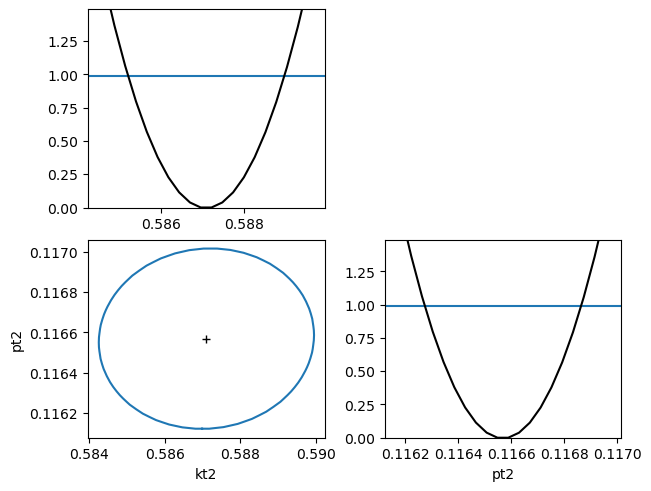

In [7]:
m_get_kT_pT.draw_mnmatrix()

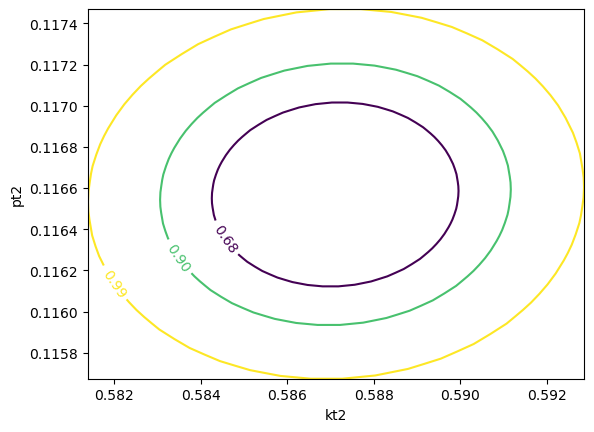

In [8]:
m_get_kT_pT.draw_mncontour("kt2", "pt2", cl=(0.68, 0.9, 0.99))